In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [3]:
df = pd.read_csv('Gurgaon_Properties_missing_values_cleaned_data.csv')

In [4]:
latlong = pd.read_csv('latlong.csv')

In [5]:
latlong.head()

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"
2,sector 3,"28.4909° N, 77.0176° E"
3,sector 4,"28.4738° N, 77.0107° E"
4,sector 5,"28.4794° N, 77.0176° E"


In [10]:
latlong['latitude'] = latlong['coordinates'].str.strip().str.split(',').str.get(0).str.strip().str.split('°').str.get(0).astype(float)
latlong['longitude'] = latlong['coordinates'].str.strip().str.split(',').str.get(1).str.strip().str.split('°').str.get(0).astype(float)

In [11]:
latlong.head()

,sector,coordinates,latitude,longitude
0,sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176


In [12]:
new_df = df.merge(latlong,  on = 'sector')

In [13]:
new_df.head()

,Property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,...,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,coordinates,latitude,longitude
0,house,independent,sector 12,2.90,10741.0,7,7,3,2.0,Old Property,...,0,0,0,0,0,1,7,"28.4723° N, 77.0320° E",28.4723,77.0320
1,flat,umang winter hills,sector 77,0.86,6408.0,2,2,2,16.0,New Property,...,0,0,0,0,0,2,79,"28.3801° N, 76.9845° E",28.3801,76.9845
2,flat,ambience creacions,sector 22,2.55,13710.0,3,3,3,8.0,Relatively New,...,0,0,0,0,1,0,125,"28.5072° N, 77.0640° E",28.5072,77.0640
3,house,suncity essel towers,sector 28,8.95,17900.0,5,6,3+,4.0,Moderately Old,...,0,0,0,0,0,1,0,"28.4728° N, 77.0865° E",28.4728,77.0865
4,flat,godrej summit,sector 104,0.98,5950.0,3,3,3,12.0,Relatively New,...,0,0,0,0,1,1,79,"28.4788° N, 76.9960° E",28.4788,76.9960


In [15]:
group_df = new_df.groupby('sector')[['price' , 'price_per_sqft' , 'built_up_area', 'latitude', 'longitude']].mean()

In [16]:
group_df.head()

,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,
gwal pahari,3.192222,9585.777778,3056.166667,28.4484,77.0210
manesar,0.962258,4608.064516,2027.367742,28.3515,76.9428
sector 1,1.860000,8249.833333,2327.833333,28.3663,76.9456
sector 102,1.696636,10603.822430,1556.130841,28.4750,76.9715
sector 103,1.495000,7445.785714,1865.428571,28.4949,76.9845


In [18]:
fig = px.scatter_mapbox(group_df, lat="latitude", lon="longitude", color="price_per_sqft", size='built_up_area',
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  mapbox_style="open-street-map",text=group_df.index)
fig.show()

In [19]:
new_df.to_csv('data_viz1.csv',index=False)

In [20]:
df1 = pd.read_csv('Gurgaon_Properties_data.csv')

In [21]:
df1

,property_name,Property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,7 Bedroom House for sale in Mianwali Colony,house,independent,2.90,10740.0,2700.0,Plot area 2700(250.84 sq.m.),7,7,3,not available,"Mianwali Colony, Gurgaon, Haryana",2.0,South-West,10+ Year Old,"['Hanuman Mandir', 'Sheetla Mata Mandir', 'M G...",Walking distance from gurgaon main bus stand a...,NaN,['Water Storage'],"['Environment3.5 out of 5', 'Lifestyle4 out of..."
1,2 BHK Flat in Sector 77 Gurgaon,flat,umang winter hills,0.86,6408.0,1342.0,Super Built up area 1342(124.68 sq.m.),2,2,2,not available,"Sector 77 Gurgaon, Gurgaon, Haryana",16.0,NaN,0 to 1 Year Old,"['Entertainland Mall', 'Delhi Jaipur Expresswa...",We are the proud owners of this 2 bhk apartmen...,"['1 Water Purifier', '5 Fan', '3 Geyser', '1 S...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Green Area5 out of 5', 'Construction5 out of..."
2,3 BHK Flat in Sector 22 Gurgaon,flat,ambience creacions,2.55,13709.0,1860.0,Super Built up area 1860(172.8 sq.m.)Built Up ...,3,3,3,others,"A803, Sector 22 Gurgaon, Gurgaon, Haryana",8.0,North-East,1 to 5 Year Old,"['Moulsari Avenue', 'Ambience Mall', 'Old Delh...",This 3 bhk flat is located in ambience creacio...,"['3 Wardrobe', '5 Fan', '1 Fridge', '1 Exhaust...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Environment4 out of 5', 'Lifestyle4 out of 5..."
3,12 Bedroom House for sale in DLF Phase 2,house,dlf city plots phase 2,10.00,400000.0,250.0,Plot area 250(23.23 sq.m.),12,12,3+,"study room,servant room","Kkmb108, DLF Phase 2, Gurgaon, Haryana",4.0,North,1 to 5 Year Old,"['Vodafone belvedere towers metro station', 'D...",12 bedroom with 1 study room.On every floor fl...,"['24 Fan', '1 Exhaust Fan', '12 Geyser', '1 St...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Environment5 out of 5', 'Lifestyle5 out of 5..."
4,5 Bedroom House for sale in Sector 28 Gurgaon,house,suncity essel towers,8.95,17900.0,5000.0,Plot area 5000(464.52 sq.m.),5,6,3+,not available,"Sector 28 Gurgaon, Gurgaon, Haryana",4.0,NaN,5 to 10 Year Old,"['Iffco chowk metro station', 'Mg road metro s...","East entry vastu perfect\nLot of daylight, no ...",NaN,NaN,"['Environment4 out of 5', 'Lifestyle5 out of 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956,4 Bedroom House for sale in Shivaji Nagar,house,not applicable,2.20,12222.0,1800.0,Plot area 1800(167.23 sq.m.),4,3,2,"pooja room,study room",NaN,1.0,South,10+ Year Old,"['Rajiv Chowk Mosque', 'Hanuman Mandir', 'Hdfc...",We are proud owners of house/villa available f...,[],"['Private Garden / Terrace', 'Park', 'Visitor ...","['Environment4 out of 5', 'Lifestyle4 out of 5..."
3957,6 BHK Flat in Sector 70 Gurgaon,flat,tulip ivory,5.00,10416.0,4800.0,Carpet area: 4800 (445.93 sq.m.),6,7,3+,"study room,servant room","Sector 70 Gurgaon, Gurgaon, Haryana",0.0,NaN,1 to 5 Year Old,"['Reach 3 Roads Shopping Mall', 'Southern Peri...",It is new unused property park facing with kit...,[],"['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Green Area3.5 out of 5', 'Construction3.5 ou..."
3958,3 BHK Flat in Nirvana Country,flat,the close north,2.35,11358.0,2069.0,Super Built up area 2069(192.22 sq.m.)Built Up...,3,3,3,not available,"8,9, Nirvana Country, Gurgaon, Haryana",8.0,North-West,5 to 10 Year Old,"['Sector 55-56 Metro Station', 'Eros City Squa...","Available for sale in a 3 bedroom room, 3bathr...","['3 Wardrobe', '7 Fan', '1 Exhaust Fan', '3 Ge...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Green Area5 out of 5', 'Construction4 out of..."
3959,3 BHK Flat in Sector 78 Gurgaon,flat,umang monsoon breeze,0.90,4615.0,1950.0,Super Built up area 1950(181.16 sq.m.)Built Up...,3,3,2,"pooja room,servant room","Sector 78 Gurgaon, Gurgaon, Haryana",1.0,NaN,5 to 10 Year Old,"['Proposed Metro Station', 'Mahapal Shing', 'N

In [22]:
wordcloud_df = df1.merge(df , left_index=True , right_index=True)[['features' , 'sector']]

In [25]:
import ast
main = []
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)

In [26]:
main

['Water Storage',
 'Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Intercom Facility',
 'Lift(s)',
 'Water purifier',
 'Maintenance Staff',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Internet/wi-fi connectivity',
 'Fitness Centre / GYM',
 'Rain Water Harvesting',
 'Club house / Community Center',
 'Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Intercom Facility',
 'Lift(s)',
 'Centrally Air Conditioned',
 'High Ceiling Height',
 'Maintenance Staff',
 'False Ceiling Lighting',
 'Water Storage',
 'No open drainage around',
 'Bank Attached Property',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Natural Light',
 'Airy Rooms',
 'Low Density Society',
 'Shopping Centre',
 'Fitness Centre / GYM',
 'Waste Disposal',
 'Rain Water Harvesting',
 'Club house / Community Center',
 'Water softening plant',
 'Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Private Garden / Terrace',
 'High Ceiling Height',
 'Maintenance Staff',
 'False Ceiling Lighting',


In [27]:
from wordcloud import WordCloud

In [28]:
feature_text = ' '.join(main)

In [29]:
feature_text

'Water Storage Security / Fire Alarm Feng Shui / Vaastu Compliant Intercom Facility Lift(s) Water purifier Maintenance Staff Visitor Parking Swimming Pool Park Internet/wi-fi connectivity Fitness Centre / GYM Rain Water Harvesting Club house / Community Center Security / Fire Alarm Feng Shui / Vaastu Compliant Intercom Facility Lift(s) Centrally Air Conditioned High Ceiling Height Maintenance Staff False Ceiling Lighting Water Storage No open drainage around Bank Attached Property Visitor Parking Swimming Pool Park Natural Light Airy Rooms Low Density Society Shopping Centre Fitness Centre / GYM Waste Disposal Rain Water Harvesting Club house / Community Center Water softening plant Security / Fire Alarm Feng Shui / Vaastu Compliant Private Garden / Terrace High Ceiling Height Maintenance Staff False Ceiling Lighting Water Storage Separate entry for servant room No open drainage around Visitor Parking Park Security Personnel Natural Light Airy Rooms Spacious Interiors Waste Disposal Ra

In [30]:
import pickle
pickle.dump(feature_text, open('feature_text.pkl','wb'))

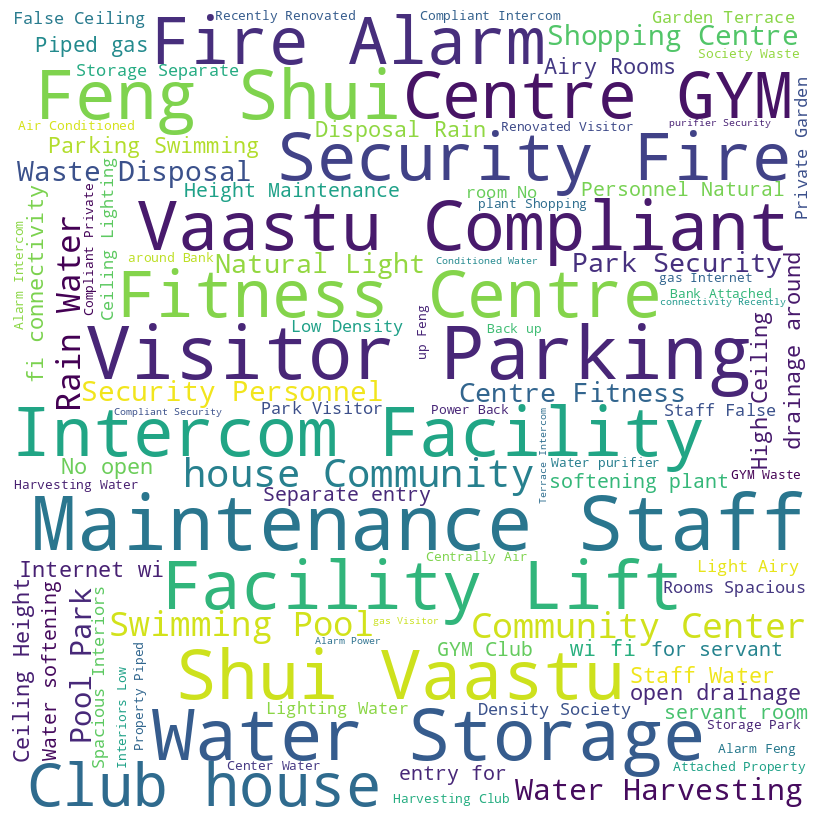

In [31]:
plt.rcParams["font.family"] = "Arial"

wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = set(['s']),  # Any stopwords you'd like to exclude
                      min_font_size = 10).generate(feature_text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show() # st.pyplot()

In [38]:
fig = px.scatter(df, x="built_up_area", y="price", color="bedRoom", title="Area Vs Price")
fig.update_layout(xaxis=dict(range=[0, 12000]))
fig.show()

In [39]:
fig = px.pie(df, names='bedRoom', title='Total Bill Amount by Day')

# Show the plot
fig.show()

In [40]:
temp_df = df[df['bedRoom'] <= 4]
# Create side-by-side boxplots of the total bill amounts by day
fig = px.box(temp_df, x='bedRoom', y='price', title='BHK Price Range')

# Show the plot
fig.show()

<Axes: xlabel='price', ylabel='Density'>

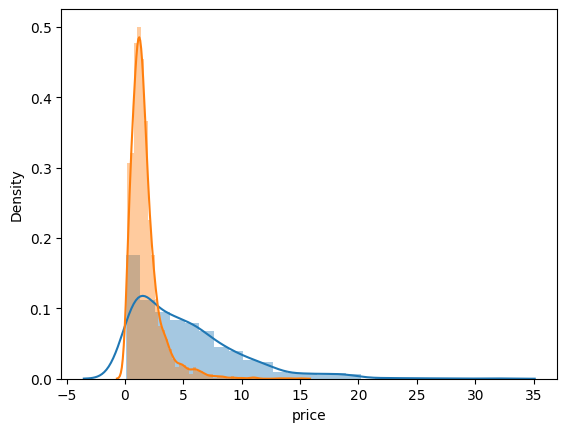

In [42]:
sns.distplot(df[df['Property_type'] == 'house']['price'])
sns.distplot(df[df['Property_type'] == 'flat']['price'])